In [6]:
!pip install nltk
!pip install -q wordcloud
!pip install matplotlib
!pip install vaderSentiment

^C


# Imports

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords


import nltk
nltk.download('stopwords');


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jneig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Wordcloud For Shinigami Dataset

In [64]:
stop = stopwords.words('english')

df = pd.read_csv("./datasets/shinigami.csv", encoding="utf-8", sep=',')

df.rename(columns={'message to examine': 'text', 'label (depression result)': 'label'}, inplace=True)


import re

#Remove stopwords from the dataset
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Remove links
df['text'] = df['text'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", x))

# Remove twitter handles
df['text'] = df['text'].apply(lambda x : re.sub('@[^\s]+','',x))

# Remove Non A-Z or 0-9 characters 
df['text'] = df['text'].apply(lambda x : re.sub('[^\sa-zA-Z0-9]+','',x))


display(df)

,Index,text,label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,,0
3,288,Need send em accountant tomorrow Oddly I even...,0
4,540,ADD ME ON MYSPACE,0
...,...,...,...
10309,802309,No Depression G Herbo mood on im done stressin...,1
10310,802310,What depression succumbs brain makes feel like...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake bad day depression everyone em,1


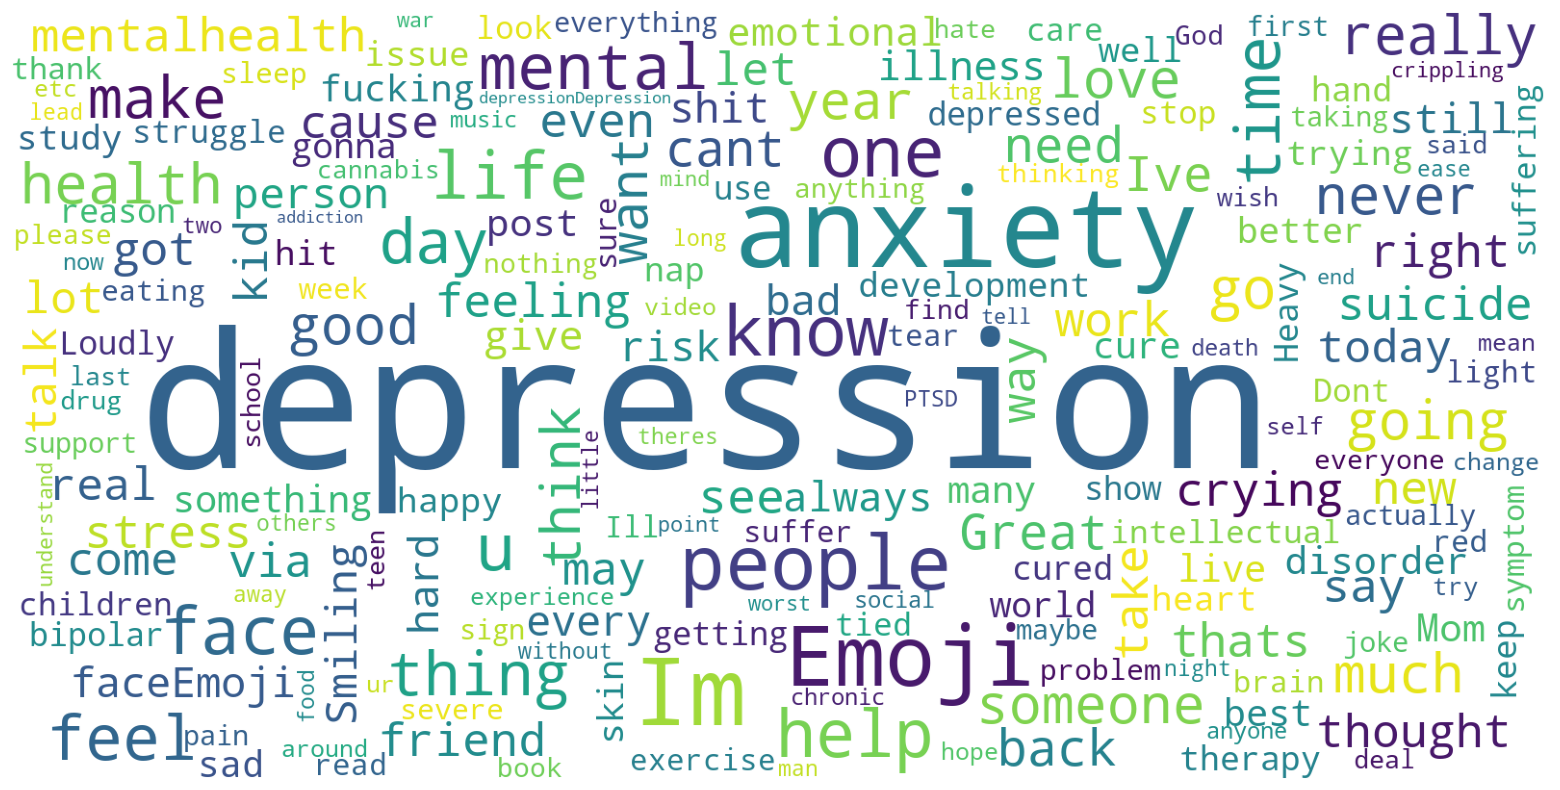

In [59]:
depressed_df = df[df['label'] == 1]

depressed_df.head(10)

text = depressed_df['text'].values
text= ''.join(text)

wordcloud = WordCloud(collocations = False, background_color = 'white', width=1600, height=800).generate(str(text))
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud);

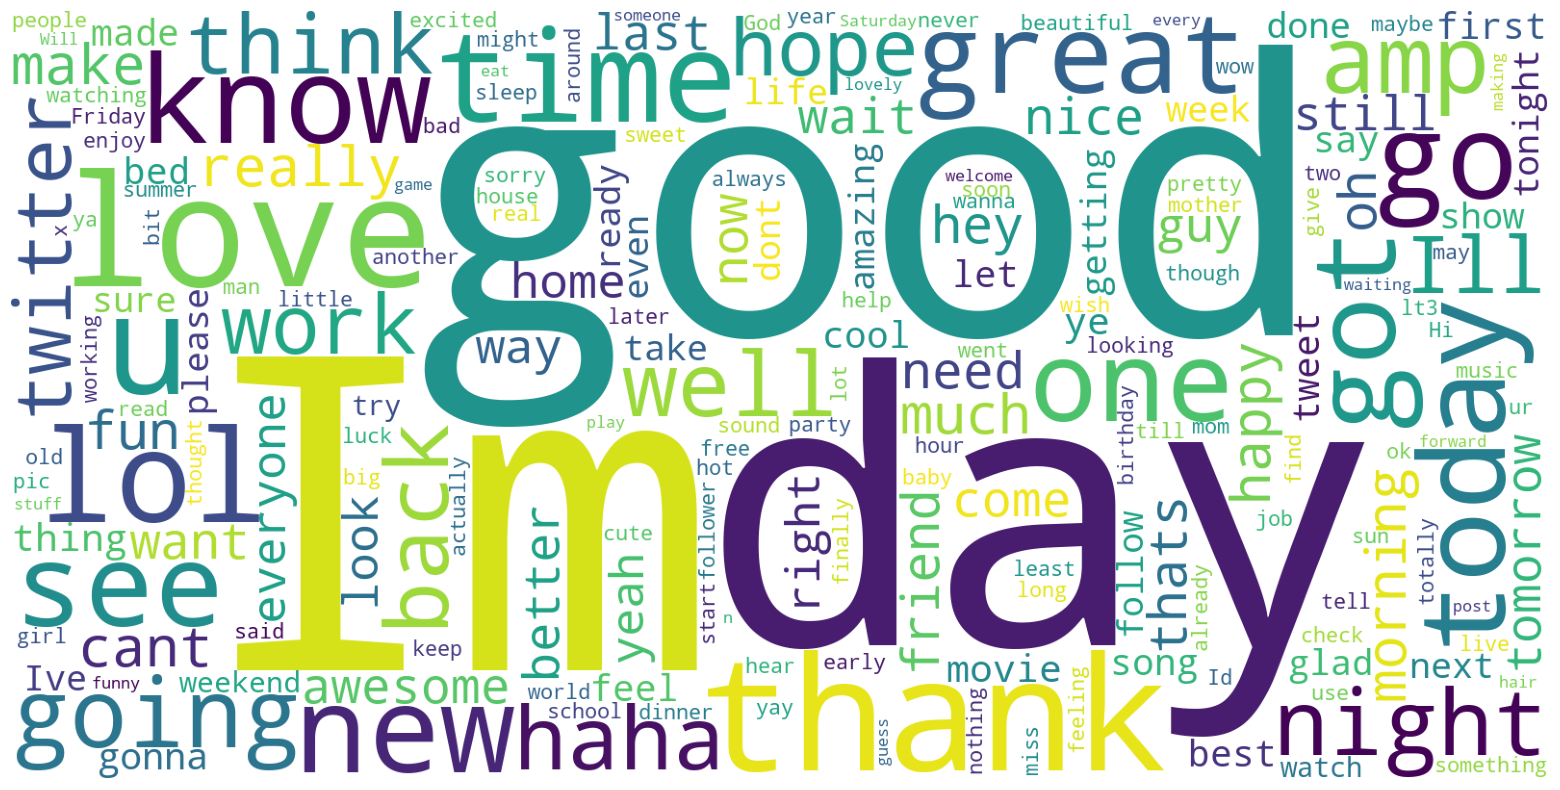

In [60]:
non_depressed = df[df['label'] == 0]

text = non_depressed['text'].values

text= ''.join(text)

wordcloud = WordCloud(collocations = False, background_color = 'white', width=1600, height=800).generate(str(text))
plt.figure(figsize=(20,10))
plt.tight_layout(pad=0)
plt.axis("off")
plt.imshow(wordcloud);

C:\Users\jneig\AppData\Local\Temp\ipykernel_26412\483043731.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'negative'] = sentiment['neg']
C:\Users\jneig\AppData\Local\Temp\ipykernel_26412\483043731.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'neutral'] = sentiment['neu']
C:\Users\jneig\AppData\Local\Temp\ipykernel_26412\483043731.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

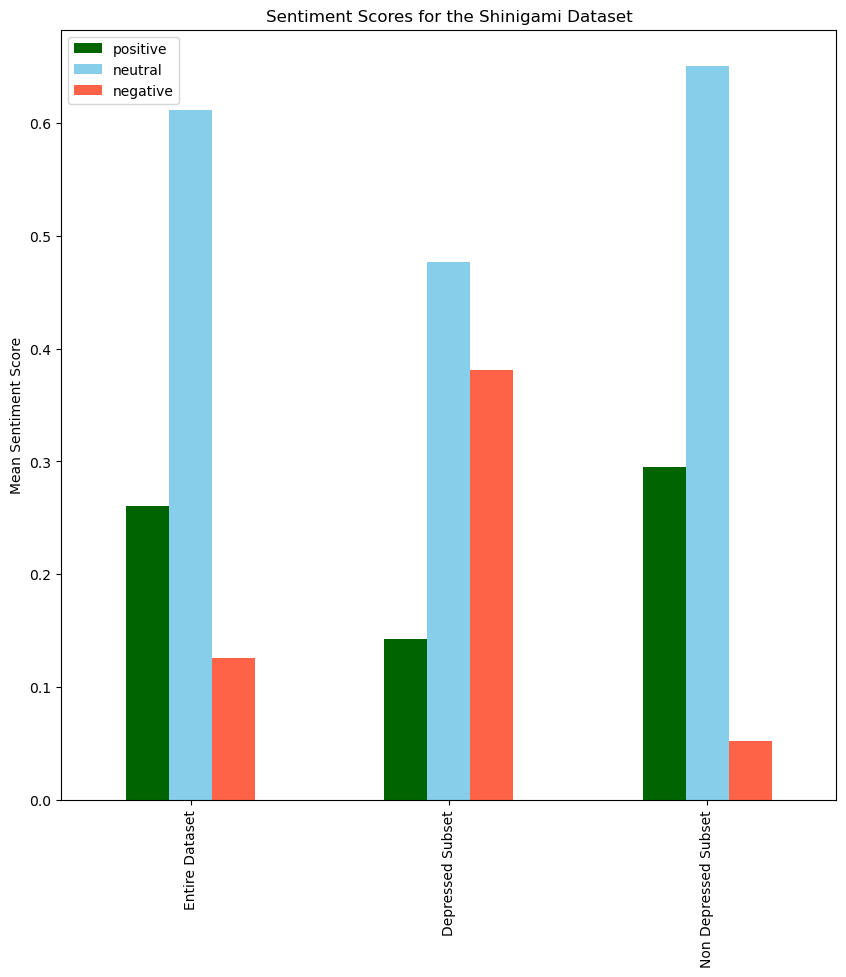

In [62]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

non_depressed_df = df[df['label'] == 0]

analyzer = SentimentIntensityAnalyzer()

for index, row in non_depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    non_depressed_df.at[index, 'negative'] = sentiment['neg']
    non_depressed_df.at[index, 'neutral'] = sentiment['neu']
    non_depressed_df.at[index, 'positive'] = sentiment['pos']
    non_depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
non_depressed_negative_mean = non_depressed_df.loc[:, 'negative'].mean()
non_depressed_neutral_mean = non_depressed_df.loc[:, 'neutral'].mean()
non_depressed_positive_mean = non_depressed_df.loc[:, 'positive'].mean()
non_depressed_compound_mean = non_depressed_df.loc[:, 'compound'].mean()


depressed_df = df[df['label'] == 1]

for index, row in depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    depressed_df.at[index, 'negative'] = sentiment['neg']
    depressed_df.at[index, 'neutral'] = sentiment['neu']
    depressed_df.at[index, 'positive'] = sentiment['pos']
    depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the depressed dataset
depressed_negative_mean = depressed_df.loc[:, 'negative'].mean()
depressed_neutral_mean = depressed_df.loc[:, 'neutral'].mean()
depressed_positive_mean = depressed_df.loc[:, 'positive'].mean()
depressed_compound_mean = depressed_df.loc[:, 'compound'].mean()


all_data = df.copy()

for index, row in all_data.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    all_data.at[index, 'negative'] = sentiment['neg']
    all_data.at[index, 'neutral'] = sentiment['neu']
    all_data.at[index, 'positive'] = sentiment['pos']
    all_data.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
all_data_negative_mean = all_data.loc[:, 'negative'].mean()
all_data_neutral_mean = all_data.loc[:, 'neutral'].mean()
all_data_positive_mean = all_data.loc[:, 'positive'].mean()
all_data_compound_mean = all_data.loc[:, 'compound'].mean()


d = {'positive': [all_data_positive_mean,depressed_positive_mean, non_depressed_positive_mean],'neutral': [all_data_neutral_mean,depressed_neutral_mean, non_depressed_neutral_mean],'negative': [all_data_negative_mean,depressed_negative_mean, non_depressed_negative_mean],  'compound': [all_data_compound_mean, depressed_compound_mean, non_depressed_compound_mean]}

dataset_averages_df = pd.DataFrame(data=d, index=['Entire Dataset', 'Depressed Subset', 'Non Depressed Subset'])

ax = dataset_averages_df.plot.bar(y=['positive', 'neutral', 'negative'], figsize=[10,10], color = ['darkgreen', 'skyblue', 'tomato'])
ax.set_ylabel("Mean Sentiment Score")
ax.set_title('Sentiment Scores for the Shinigami Dataset');


C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2220395595.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'negative'] = sentiment['neg']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2220395595.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'neutral'] = sentiment['neu']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\2220395595.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

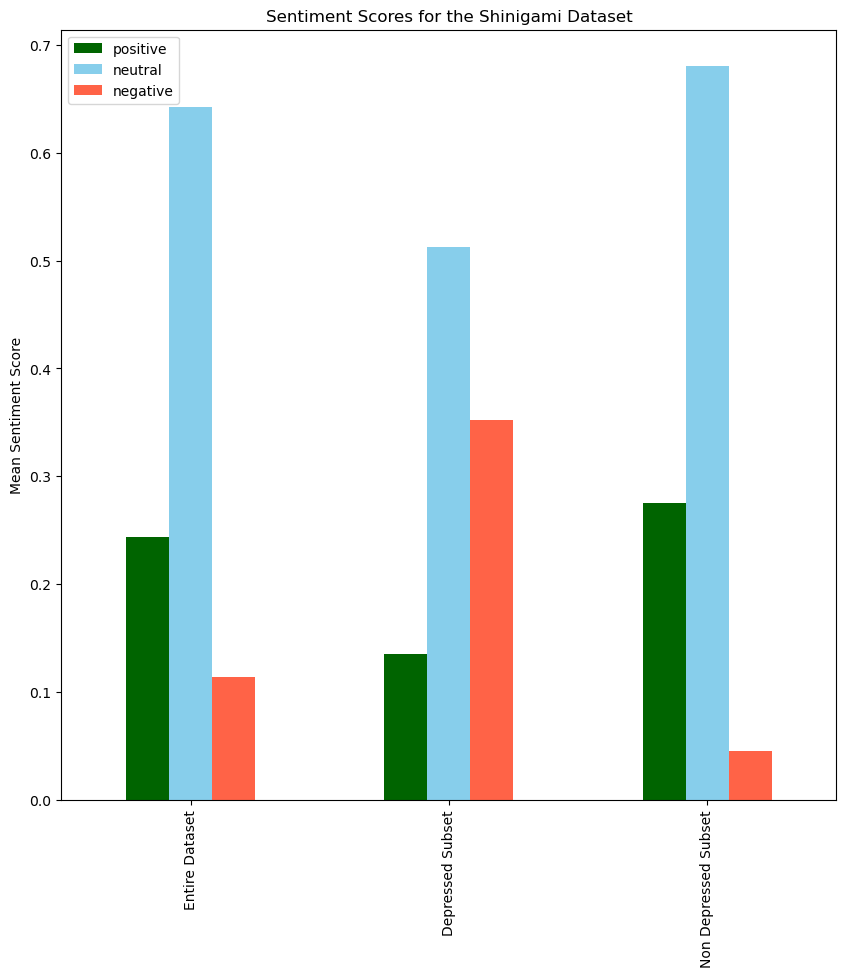

In [11]:
stop = stopwords.words('english')

df = pd.read_csv("./datasets/shinigami.csv", encoding="utf-8", sep=',')

df.rename(columns={'message to examine': 'text', 'label (depression result)': 'label'}, inplace=True)

# Remove stopwords from the dataset
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

non_depressed_df = df[df['label'] == 0]

analyzer = SentimentIntensityAnalyzer()

for index, row in non_depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    non_depressed_df.at[index, 'negative'] = sentiment['neg']
    non_depressed_df.at[index, 'neutral'] = sentiment['neu']
    non_depressed_df.at[index, 'positive'] = sentiment['pos']
    non_depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
non_depressed_negative_mean = non_depressed_df.loc[:, 'negative'].mean()
non_depressed_neutral_mean = non_depressed_df.loc[:, 'neutral'].mean()
non_depressed_positive_mean = non_depressed_df.loc[:, 'positive'].mean()
non_depressed_compound_mean = non_depressed_df.loc[:, 'compound'].mean()


depressed_df = df[df['label'] == 1]

for index, row in depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    depressed_df.at[index, 'negative'] = sentiment['neg']
    depressed_df.at[index, 'neutral'] = sentiment['neu']
    depressed_df.at[index, 'positive'] = sentiment['pos']
    depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the depressed dataset
depressed_negative_mean = depressed_df.loc[:, 'negative'].mean()
depressed_neutral_mean = depressed_df.loc[:, 'neutral'].mean()
depressed_positive_mean = depressed_df.loc[:, 'positive'].mean()
depressed_compound_mean = depressed_df.loc[:, 'compound'].mean()


all_data = df.copy()

for index, row in all_data.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    all_data.at[index, 'negative'] = sentiment['neg']
    all_data.at[index, 'neutral'] = sentiment['neu']
    all_data.at[index, 'positive'] = sentiment['pos']
    all_data.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
all_data_negative_mean = all_data.loc[:, 'negative'].mean()
all_data_neutral_mean = all_data.loc[:, 'neutral'].mean()
all_data_positive_mean = all_data.loc[:, 'positive'].mean()
all_data_compound_mean = all_data.loc[:, 'compound'].mean()


d = {'positive': [all_data_positive_mean,depressed_positive_mean, non_depressed_positive_mean],'neutral': [all_data_neutral_mean,depressed_neutral_mean, non_depressed_neutral_mean],'negative': [all_data_negative_mean,depressed_negative_mean, non_depressed_negative_mean],  'compound': [all_data_compound_mean, depressed_compound_mean, non_depressed_compound_mean]}

dataset_averages_df = pd.DataFrame(data=d, index=['Entire Dataset', 'Depressed Subset', 'Non Depressed Subset'])

ax = dataset_averages_df.plot.bar(y=['positive', 'neutral', 'negative'], figsize=[10,10], color = ['darkgreen', 'skyblue', 'tomato'])
ax.set_ylabel("Mean Sentiment Score");
ax.set_title('Sentiment Scores for the Shinigami Dataset');


C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\565929659.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'negative'] = sentiment['neg']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\565929659.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_depressed_df.at[index, 'neutral'] = sentiment['neu']
C:\Users\jneig\AppData\Local\Temp\ipykernel_6480\565929659.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

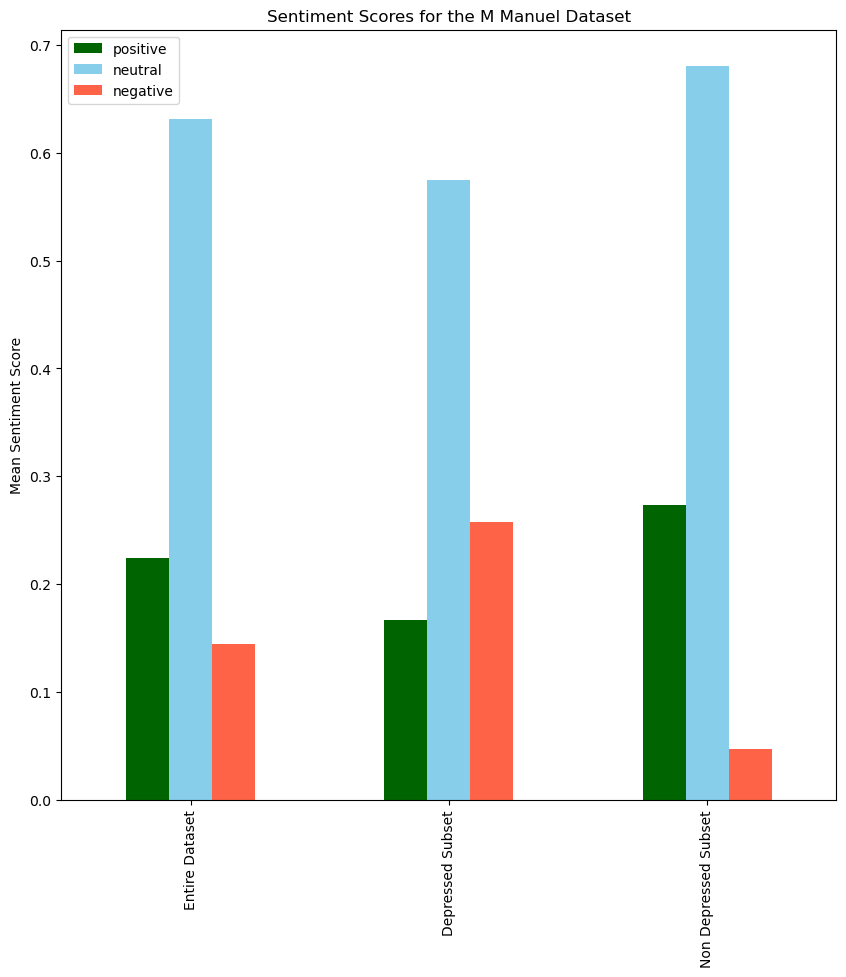

In [13]:
stop = stopwords.words('english')

df = pd.read_csv("./datasets/M_manuel_depression_detection.csv", encoding="utf-8", sep=',')

# Remove stopwords from the dataset
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

non_depressed_df = df[df['label'] == 0]

analyzer = SentimentIntensityAnalyzer()

for index, row in non_depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    non_depressed_df.at[index, 'negative'] = sentiment['neg']
    non_depressed_df.at[index, 'neutral'] = sentiment['neu']
    non_depressed_df.at[index, 'positive'] = sentiment['pos']
    non_depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
non_depressed_negative_mean = non_depressed_df.loc[:, 'negative'].mean()
non_depressed_neutral_mean = non_depressed_df.loc[:, 'neutral'].mean()
non_depressed_positive_mean = non_depressed_df.loc[:, 'positive'].mean()
non_depressed_compound_mean = non_depressed_df.loc[:, 'compound'].mean()


depressed_df = df[df['label'] == 1]

for index, row in depressed_df.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    depressed_df.at[index, 'negative'] = sentiment['neg']
    depressed_df.at[index, 'neutral'] = sentiment['neu']
    depressed_df.at[index, 'positive'] = sentiment['pos']
    depressed_df.at[index, 'compound'] = sentiment['compound']

# Get average scores for the depressed dataset
depressed_negative_mean = depressed_df.loc[:, 'negative'].mean()
depressed_neutral_mean = depressed_df.loc[:, 'neutral'].mean()
depressed_positive_mean = depressed_df.loc[:, 'positive'].mean()
depressed_compound_mean = depressed_df.loc[:, 'compound'].mean()


all_data = df.copy()

for index, row in all_data.iterrows():
    sentence = row['text']
    sentiment = analyzer.polarity_scores(sentence)

    all_data.at[index, 'negative'] = sentiment['neg']
    all_data.at[index, 'neutral'] = sentiment['neu']
    all_data.at[index, 'positive'] = sentiment['pos']
    all_data.at[index, 'compound'] = sentiment['compound']

# Get average scores for the non-depressed dataset
all_data_negative_mean = all_data.loc[:, 'negative'].mean()
all_data_neutral_mean = all_data.loc[:, 'neutral'].mean()
all_data_positive_mean = all_data.loc[:, 'positive'].mean()
all_data_compound_mean = all_data.loc[:, 'compound'].mean()


d = {'positive': [all_data_positive_mean,depressed_positive_mean, non_depressed_positive_mean],'neutral': [all_data_neutral_mean,depressed_neutral_mean, non_depressed_neutral_mean],'negative': [all_data_negative_mean,depressed_negative_mean, non_depressed_negative_mean],  'compound': [all_data_compound_mean, depressed_compound_mean, non_depressed_compound_mean]}

dataset_averages_df = pd.DataFrame(data=d, index=['Entire Dataset', 'Depressed Subset', 'Non Depressed Subset'])

ax = dataset_averages_df.plot.bar(y=['positive', 'neutral', 'negative'], figsize=[10,10], color = ['darkgreen', 'skyblue', 'tomato'])
ax.set_ylabel("Mean Sentiment Score");
ax.set_title('Sentiment Scores for the M Manuel Dataset');

,positive,neutral,negative,compound
Depressed Subset,0.330614,0.6108,0.058579,0.535319
Non Depressed Subset,0.330614,0.6108,0.058579,0.535319
Entire Dataset,0.330614,0.6108,0.058579,0.535319


,Index,text,label,Message Size
0,106,real good moment missssssssss much,Not Depressed,34
1,217,reading manga,Not Depressed,15
2,220,,Not Depressed,5
3,288,Need send em accountant tomorrow Oddly I even...,Not Depressed,95
4,540,ADD ME ON MYSPACE,Not Depressed,19
...,...,...,...,...
10309,802309,No Depression G Herbo mood on im done stressin...,Depressed,62
10310,802310,What depression succumbs brain makes feel like...,Depressed,59
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,Depressed,70
10312,802312,dont mistake bad day depression everyone em,Depressed,43


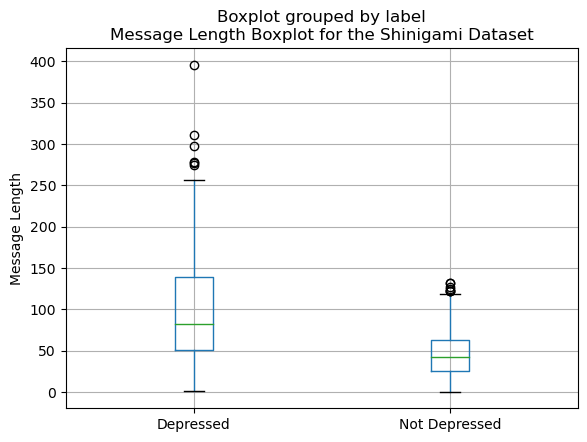

In [70]:
df1 = df.copy()

df1['label'] = df['label'].replace({1: 'Depressed', 0: 'Not Depressed'})

df1['Message Size'] = df1['text'].apply(lambda x : len(x))

ax = df1.boxplot(by='label', column='Message Size' )

ax.set_ylabel('Message Length')
ax.set_xlabel('');
ax.set_title('Message Length Boxplot for the Shinigami Dataset');